# LLM Tools: Hands-on Exercises

# Track 1: Digital Archivist

## Exercise 1: Multimodal Extraction

<span class="theorem-title">**Exercise 1**</span> **Task**: You found
this dusty yearbook page in the archives.

**Goal**: Convert it to a clean CSV.

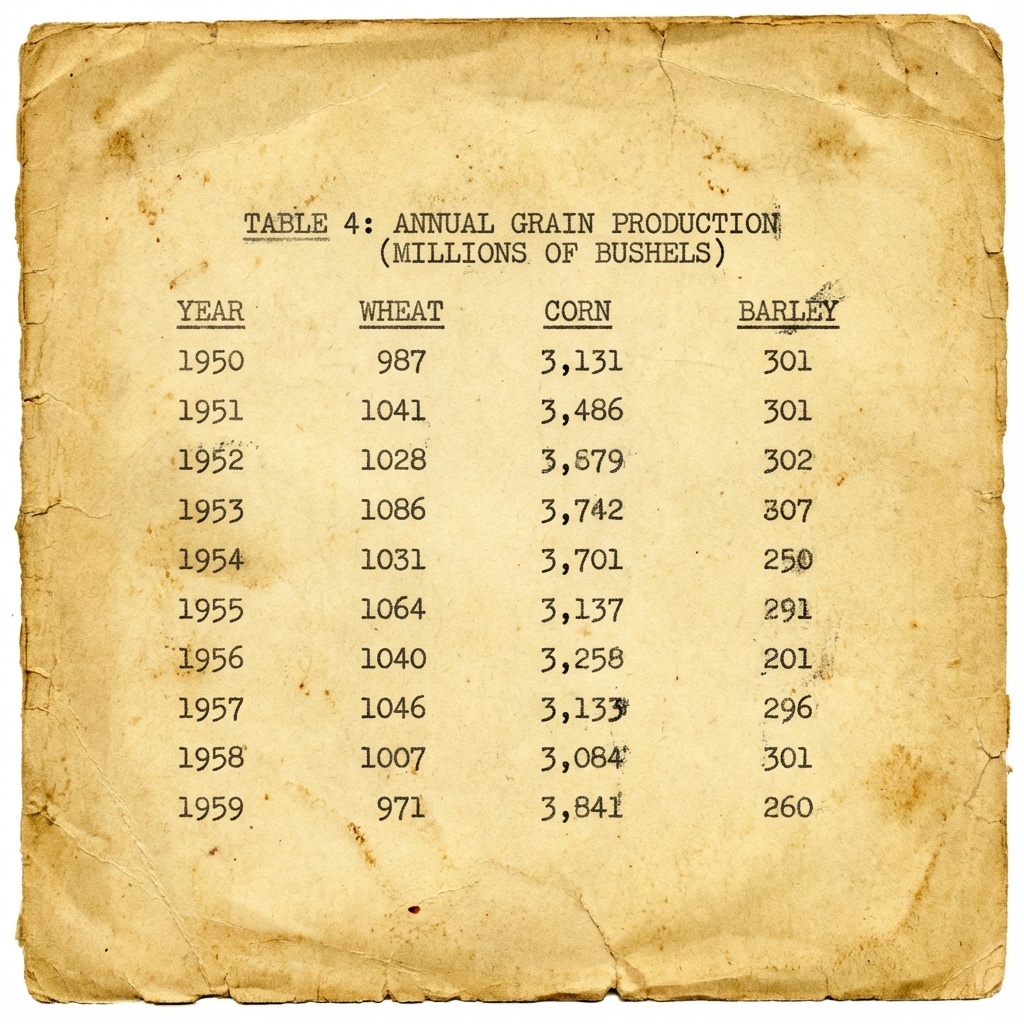

**Prompt Challenge**: Write a prompt that ensures the “Year” column is
an integer and numbers like “3,131” are parsed as `3131`.

In [2]:
# --- STUDENT AREA ---
# Variable: instructions
# Write your prompt instructions below.
instructions = """
"""
# --------------------

# Simulating the call (In a real scenario, we'd pass the image bytes too)
# For this exercise, we test the text prompt logic against a text-only model or VLM.
# Here we use a text instruction to see how a model *plans* to do it.

# NOW UPDATED: actually passing the image to the VLM!
response = query_hf(instructions, image_path="yearbook.png")
if 'error' in response:
    print("NOTE: The free Hugging Face Router API may not support VLM requests currently.")
    print(f"API Error: {response['error']}")
    print("Proceeding with mock data or skipping this step for the exercise.")
else:
    print(response)

## Exercise 2: The Solow Simulator

<span class="theorem-title">**Exercise 2**</span> **Task**: Construct a
system prompt that teaches the model how to use the `run_solow` tool.

**Goal**: The model should output the correct JSON tool call for this
user query:

> *User*: “Simulate the economy if savings double to 40% and population
> grows at 2%.”

In [3]:
# --- STUDENT AREA ---
# Variable: tool_definition
# Define the tool schema for the model to understand.
tool_definition = 

# Variable: system_prompt
# Write instructions to force the model to output ONLY the JSON for the tool call.
system_prompt = f"""
You are an economic simulation assistant.
You have access to the following tool:
{json.dumps(tool_definition)}

If the user asks for a simulation, output a JSON object with the tool name and arguments.
Format: {{"tool": "run_solow", "arguments": {{ ... }} }}
Do not output any other text.
"""
# --------------------

query = "Simulate the economy if savings double to 40% and population grows at 2%."
response = query_hf(f"[System: {system_prompt}]\nUser: {query}")

# Helper to parse the LLM's JSON output (which might be messy)
# In a real app, we'd use a robust parser or the provider's tool-calling API.
try:
    # Parse OpenAI format
    if 'choices' in response and len(response['choices']) > 0:
        model_text = response['choices'][0]['message']['content']
    else:
        model_text = str(response)

    print(f"Raw Model Response: {model_text}")
    # We'll just extract the JSON part here for simplicity if it includes other text
    # Simple heuristic: find the first '{' and valid JSON
    import re
    match = re.search(r'\{.*\}', model_text, re.DOTALL)
    if match:
        tool_call_json = json.loads(match.group(0))
    else:
        tool_call_json = {"tool": "error", "arguments": {}}
        print("Could not parse JSON from model output.")
except Exception as e:
    tool_call_json = {"tool": "error", "arguments": {}}
    print(f"Error parsing model response: {e}")

# Execution Logic (Do not edit below)
if tool_call_json.get("tool") == "run_solow":
    args = tool_call_json.get("arguments", {})
    if args:
        result = run_solow(**args)
        
        # Visualization
        plt.figure(figsize=(8,4))
        plt.plot(result, label=f"s={args.get('savings_rate')}, n={args.get('pop_growth')}")
        plt.title("Solow Growth Model Simulation")
        plt.xlabel("Year")
        plt.ylabel("GDP per Capita")
        plt.legend()
        plt.grid(True)
        plt.show()
        print(f"Final GDP per Capita: {result[-1]:.2f}")
    else:
        print("Arguments missing.")
else:
    print("Model did not call the correct tool.")
    print("Parsed:", tool_call_json)

# Track 2: Market Analyst

## Exercise 1: Technical Analysis

<span class="theorem-title">**Exercise 3**</span> **Task**: Your hedge
fund needs an automated sentiment tagger.

**Goal**: Analyze this chart.

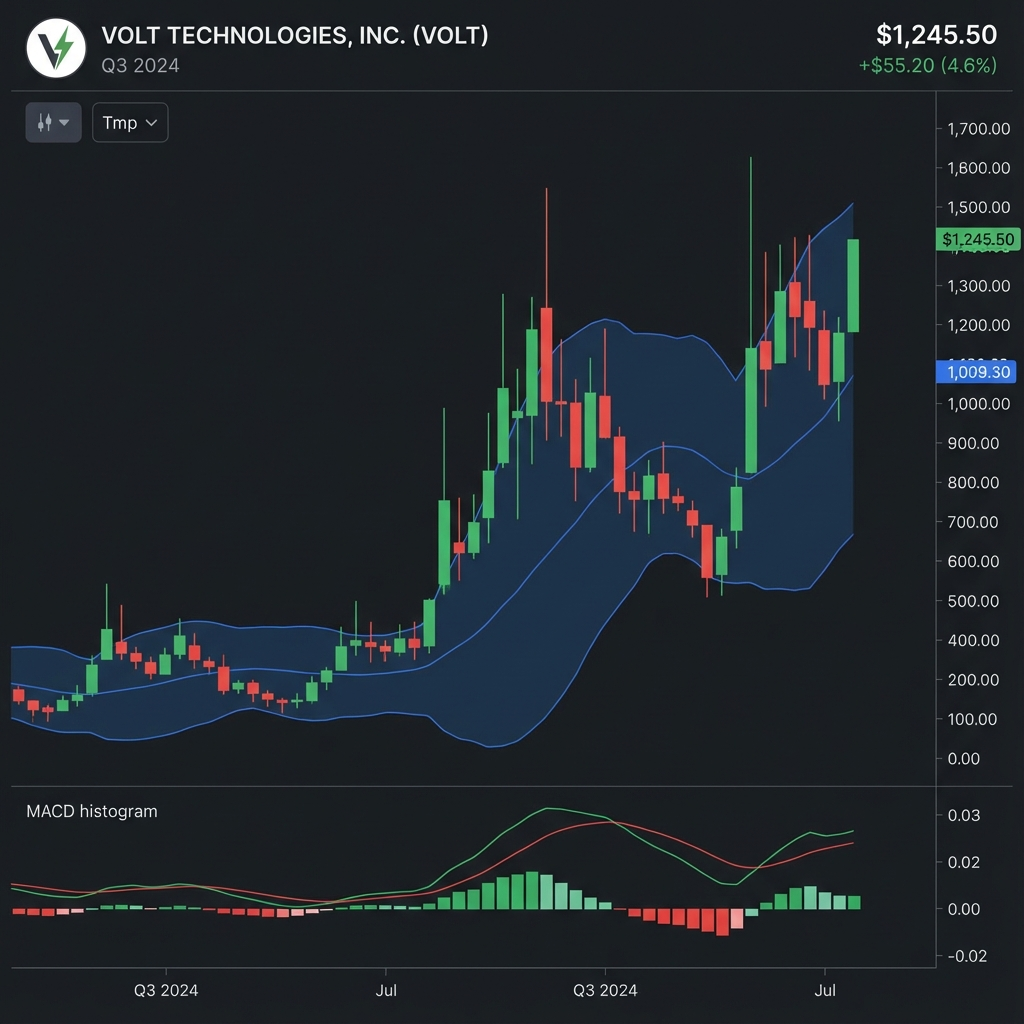

**Prompt Challenge**:

1.  Identify the **Trend** (Bullish/Bearish).
2.  Locate the **Support Level** (Visual estimation).
3.  Output as `{ "sentiment": "...", "support": 1000 }`.

In [4]:
# --- STUDENT AREA ---
# Variable: analysis_prompt
# Write the prompt to extract sentiment and support level.
analysis_prompt = """
"""
# --------------------

# Simulating the call
response = query_hf(
    analysis_prompt, 
    image_path="stock_chart.png"
)
if 'error' in response:
    print("NOTE: Vision model unavailable on free tier. Using mock response for continuity.")
    # Mock response for the student to see what it WOULD look like
    print("""{
  "choices": [
    {
      "message": {
        "content": "{\n  \"sentiment\": \"Bullish\",\n  \"support\": 1050\n}"
      }
    }
  ]
}""")
else:
    print(response)

## Exercise 2: Option Pricing

<span class="theorem-title">**Exercise 4**</span> **Task**: Create a
tool definition and prompt to handle option pricing requests.

**Goal**: The model should trigger the `black_scholes` tool for this
query:

> *User*: “Price a call option for Apple. Strike is 250, expiring in 30
> days.”

In [5]:
# --- STUDENT AREA ---
# Variable: pricing_tool_def
pricing_tool_def = 

# Variable: pricing_system_prompt
pricing_system_prompt = f"""
You have access to the following financial tools:
{json.dumps(pricing_tool_def)}

To use a tool, output valid JSON: {{"tool": "tool_name", "arguments": {{...}}}}
Only output the JSON.
"""
# --------------------

query = "Price a call option for Apple. Strike is 250, expiring in 30 days."
response = query_hf(f"[System: {pricing_system_prompt}]\nUser: {query}")

# Parsing logic
try:
    import re
    # Parse OpenAI format
    if 'choices' in response and len(response['choices']) > 0:
        text = response['choices'][0]['message']['content']
    else:
        text = str(response)
    match = re.search(r'\{.*\}', text, re.DOTALL)
    if match:
        formatted_call = json.loads(match.group(0))
    else:
        formatted_call = {}
except (KeyError, json.JSONDecodeError, AttributeError):
    formatted_call = {}

# Execution Logic (Do not edit below)
if formatted_call.get("tool") == "black_scholes":
    args = formatted_call.get("arguments", {})
    price = black_scholes(**args)
    
    print(f"Calculated Option Price for {args.get('ticker')}: ${price}")
else:
    print("Model failed to call the tool.")
    print("Output:", response)

\`\`\`